# Домашнее задание


# 🎈🍾 🎉





Вы работаете в крупном онлайн-магазине, который реализует товары «всё для праздников». Вам необходимо провести ABC-анализ и выявить наиболее важные товары на основе объемов продаж и популярности. Эта информация составит план закупок на весь следующий год. 

**ABC-анализ** позволяет определить наиболее важные ресурсы компании на основе объемов продаж и прибыли.

В основе ABC-анализа лежит __«Принцип Парето»: 20% ресурсов приносят 80% прибыли__. Именно этот вид анализа позволяет выделить те самые  группы товаров, ресурсов, клиентов, поставщиков и т. п., которые и приносят компании основную прибыль.

__Задача анализа разделить товары на группы по принципу:__

- А — наиболее ценные, 20% — ассортимента (номенклатура); 80% — продаж
- В — промежуточные, 30% — ассортимента; 15% — продаж
- С — наименее ценные, 50% — ассортимента; 5% — продаж

## Задание 1

Сохраните все данные из таблицы `products` из PostgreSQL в дата-фрейм `products` и подготовьте данные к анализу.

1. Подгрузите данные для подключения
2. Подключите нужную библиотеку для работы с PostgreSQL
3. Создайте соединение с БД
4. Создайте запрос и выгрузите все данные из таблицы `products`
5. Положите данные в дата-фрейм `products`
6. Приведите данные к удобному типу: числа к числовому типу, идентификаторы — к текстовому


In [1]:
from postgresql_secret import pg_secret

In [2]:
!pip install psycopg2-binary


In [3]:
import psycopg2

In [4]:
connection = psycopg2.connect(
                              database=pg_secret['db_name'],
                              user=pg_secret['db_user'],
                              password=pg_secret['db_password'],
                              host=pg_secret['db_host'],
                              port=pg_secret['db_port']
                             )                                    # создаем соединение с файлом



In [5]:
cursor = connection.cursor()  # заводим курсор, чтобы делать запросы в базу

In [6]:
cursor.description

In [7]:
import pandas as pd

query = "SELECT * FROM products"   
cursor.execute(query)
result=cursor.fetchall()
result



[(526349, '22751', 'FELTCRAFT PRINCESS OLIVIA DOLL', 4, Decimal('3.75')),
 (526349, '22750', 'FELTCRAFT PRINCESS LOLA DOLL', 4, Decimal('3.75')),
 (526349, '22749', 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 4, Decimal('3.75')),
 (526349, '22654', 'DELUXE SEWING KIT ', 3, Decimal('5.95')),
 (526349, '22652', 'TRAVEL SEWING KIT', 10, Decimal('1.65')),
 (526349, '22651', 'GENTLEMAN SHIRT REPAIR KIT ', 12, Decimal('0.85')),
 (526349, '22570', 'FELTCRAFT CUSHION RABBIT', 4, Decimal('3.75')),
 (526349, '22569', 'FELTCRAFT CUSHION BUTTERFLY', 4, Decimal('3.75')),
 (526349, '22568', 'FELTCRAFT CUSHION OWL', 4, Decimal('3.75')),
 (526349, '22587', 'FELTCRAFT HAIRBAND RED AND BLUE', 12, Decimal('0.85')),
 (526349, '22586', 'FELTCRAFT HAIRBAND PINK AND BLUE', 12, Decimal('0.85')),
 (526349, '22566', 'FELTCRAFT HAIRBAND PINK AND PURPLE', 12, Decimal('0.85')),
 (526349, '22492', 'MINI PAINT SET VINTAGE ', 36, Decimal('0.65')),
 (526349, '22454', 'MEASURING TAPE BABUSHKA RED', 6, Decimal('2.95')),
 (5263

In [8]:
columns = []                        # список для сохранения названия колонок
for desk in cursor.description:     # названия колонок возьмем из первого элемента
    columns.append(desk[0])
    
products=pd.DataFrame(result, columns=columns)
products.head()


,invoice_id,stock_code,description,quantity,price
0,526349,22751,FELTCRAFT PRINCESS OLIVIA DOLL,4,3.75
1,526349,22750,FELTCRAFT PRINCESS LOLA DOLL,4,3.75
2,526349,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,4,3.75
3,526349,22654,DELUXE SEWING KIT,3,5.95
4,526349,22652,TRAVEL SEWING KIT,10,1.65


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   invoice_id   779495 non-null  int64 
 1   stock_code   779495 non-null  object
 2   description  779495 non-null  object
 3   quantity     779495 non-null  int64 
 4   price        779495 non-null  object
dtypes: int64(2), object(3)
memory usage: 29.7+ MB


In [10]:
products['invoice_id'] = products['invoice_id'].apply(str)
products['price'] = products['price'].astype('float64')

In [11]:
products.head()

,invoice_id,stock_code,description,quantity,price
0,526349,22751,FELTCRAFT PRINCESS OLIVIA DOLL,4,3.75
1,526349,22750,FELTCRAFT PRINCESS LOLA DOLL,4,3.75
2,526349,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,4,3.75
3,526349,22654,DELUXE SEWING KIT,3,5.95
4,526349,22652,TRAVEL SEWING KIT,10,1.65


## Задание 2

__Посчитайте, какой доход принес каждый продукт и сколько единиц каждого продукта было продано__

1. Посчитай общую сумму оплат для каждой строки счета
2. Получи общий доход и количество единиц по товарам
3. Объедини сгруппированные данные в один датафрейм со столбцами: `description`, `stock_code`, `quantity`, `total`

In [12]:
products['total'] = products['quantity']*products['price']
products

,invoice_id,stock_code,description,quantity,price,total
0,526349,22751,FELTCRAFT PRINCESS OLIVIA DOLL,4,3.75,15.00
1,526349,22750,FELTCRAFT PRINCESS LOLA DOLL,4,3.75,15.00
2,526349,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,4,3.75,15.00
3,526349,22654,DELUXE SEWING KIT,3,5.95,17.85
4,526349,22652,TRAVEL SEWING KIT,10,1.65,16.50
...,...,...,...,...,...,...
779490,526349,85178,VICTORIAN SEWING KIT,12,1.25,15.00
779491,526349,85177,BASKET OF FLOWERS SEWING KIT,12,0.85,10.20
779492,526349,85176,SEWING SUSAN 21 NEEDLE SET,12,0.85,10.20
779493,526349,22813,PACK 3 BOXES BIRD PANNETONE,12,1.95,23.40


In [13]:
products_total =products.groupby(['stock_code'])['total'].sum().reset_index()# посчитай общих доход по каждому товару
products_total

,stock_code,total
0,10002,6638.27
1,10080,124.61
2,10109,1.68
3,10120,136.08
4,10123C,226.76
...,...,...
4626,PADS,0.00
4627,POST,124648.04
4628,SP1002,14.75
4629,TEST001,225.00


In [14]:
products_count =products.groupby(['stock_code'])['quantity'].sum().reset_index() # посчитай общее количество проданных единиц по каждому товару
products_count  

,stock_code,quantity
0,10002,8479
1,10080,303
2,10109,4
3,10120,648
4,10123C,628
...,...,...
4626,PADS,18
4627,POST,5235
4628,SP1002,5
4629,TEST001,60


In [15]:
products_new=pd.merge(products_total, products_count, on='stock_code', how='left') # объедини общие данные в одну таблицу
products_new

,stock_code,total,quantity
0,10002,6638.27,8479
1,10080,124.61,303
2,10109,1.68,4
3,10120,136.08,648
4,10123C,226.76,628
...,...,...,...
4626,PADS,0.00,18
4627,POST,124648.04,5235
4628,SP1002,14.75,5
4629,TEST001,225.00,60


## Задание 3

__Найди нарастающий итог по процентам__

1. Отсортируй датафрейм по доходу в нисходящем порядке 
2. Найди процент дохода каждого товара в общем доходе 
3. Сделай нарастающий итог (running total) по процентам каждого товара, для этого найди в интернете и примени метод для расчета кумулятивной суммы в `pandas`. 


Нарастающий итог — это представление данных, в котором мы видим динамику нарастания или убывания суммы от начала отсчета до конца. Получаем мы эту кумулятивную сумму, прибавлением поочередно каждого следующего элемента к сумме предыдущих.  



In [16]:
products_new.sort_values(by='total', ascending=False) # отсортируй дата-фрейм (большие вверху, маленькие внизу)
products_new

,stock_code,total,quantity
0,10002,6638.27,8479
1,10080,124.61,303
2,10109,1.68,4
3,10120,136.08,648
4,10123C,226.76,628
...,...,...,...
4626,PADS,0.00,18
4627,POST,124648.04,5235
4628,SP1002,14.75,5
4629,TEST001,225.00,60


In [17]:
# найди процент дохода для каждого товара 
#(искомая часть / целое число) * 100

products_new_sum=round(products_new['total'].sum())

products_new['percent_total']=round((products_new['total']/products_new_sum)*100,2)
products_new

,stock_code,total,quantity,percent_total
0,10002,6638.27,8479,0.04
1,10080,124.61,303,0.00
2,10109,1.68,4,0.00
3,10120,136.08,648,0.00
4,10123C,226.76,628,0.00
...,...,...,...,...
4626,PADS,0.00,18,0.00
4627,POST,124648.04,5235,0.72
4628,SP1002,14.75,5,0.00
4629,TEST001,225.00,60,0.00


In [18]:
# используй метод pandas для кумулятивной суммы

products_new['running_total_percent']=round(products_new['percent_total'].cumsum(),2)
products_new

,stock_code,total,quantity,percent_total,running_total_percent
0,10002,6638.27,8479,0.04,0.04
1,10080,124.61,303,0.00,0.04
2,10109,1.68,4,0.00,0.04
3,10120,136.08,648,0.00,0.04
4,10123C,226.76,628,0.00,0.04
...,...,...,...,...,...
4626,PADS,0.00,18,0.00,96.86
4627,POST,124648.04,5235,0.72,97.58
4628,SP1002,14.75,5,0.00,97.58
4629,TEST001,225.00,60,0.00,97.58


## Задание 4

__Пометь товары метками `'A'`, `'B'`, `'C'` в зависимости от нарастающего итога__

1. Напиши функцию, которая будет помечать товары с нарастающим итогом ниже или равно 80% как группу `'A'`, от 80%-95% — как `'B'` и остальные как `'C'`

In [19]:
products_ABC_total=products_new.copy()
products_ABC_total

,stock_code,total,quantity,percent_total,running_total_percent
0,10002,6638.27,8479,0.04,0.04
1,10080,124.61,303,0.00,0.04
2,10109,1.68,4,0.00,0.04
3,10120,136.08,648,0.00,0.04
4,10123C,226.76,628,0.00,0.04
...,...,...,...,...,...
4626,PADS,0.00,18,0.00,96.86
4627,POST,124648.04,5235,0.72,97.58
4628,SP1002,14.75,5,0.00,97.58
4629,TEST001,225.00,60,0.00,97.58


In [20]:
def revenue(x):
    if x <= 80:
        return 'A'
    elif x <=95:
        return 'B'
    else:
        return 'C'

# создай новый столбец revenue с помощью функции

products_ABC_total['revenue']=products_ABC_total['running_total_percent'].apply(revenue)
products_ABC_total

,stock_code,total,quantity,percent_total,running_total_percent,revenue
0,10002,6638.27,8479,0.04,0.04,A
1,10080,124.61,303,0.00,0.04,A
2,10109,1.68,4,0.00,0.04,A
3,10120,136.08,648,0.00,0.04,A
4,10123C,226.76,628,0.00,0.04,A
...,...,...,...,...,...,...
4626,PADS,0.00,18,0.00,96.86,C
4627,POST,124648.04,5235,0.72,97.58,C
4628,SP1002,14.75,5,0.00,97.58,C
4629,TEST001,225.00,60,0.00,97.58,C


## Задание 5

__Найди нарастающий итог по количеству товарных единиц и пометь товары метками `'A'`, `'B'`, `'C'`, отмечая тем самым популярность товара__

1. Отсортируй предыдущий датафрейм с данными о доходе теперь по количеству товаров
2. Найди процент каждого товара в общем количестве
3. Найди нарастающий итог по количеству
4. Напиши функцию с теми же параметрами, что и у дохода
5. Отметь группу

In [21]:
prod=products_ABC_total.sort_values(by='quantity', ascending=False)
prod

,stock_code,total,quantity,percent_total,running_total_percent,revenue
3410,84077,24098.03,105185,0.14,84.25,B
4058,85099B,167920.64,93436,0.97,92.47,B
4080,85123A,247203.36,91814,1.42,94.68,B
601,21212,43390.03,89850,0.25,10.79,A
2726,23843,168469.60,80995,0.97,74.35,A
...,...,...,...,...,...,...
2936,37484,6.75,1,0.00,75.26,A
4144,85171,2.55,1,0.00,95.21,C
2917,37451,4.95,1,0.00,75.23,A
2907,37438,3.75,1,0.00,74.97,A


In [22]:
prod_sum=prod['quantity'].sum()

prod['percent_quantity']=round((prod['quantity']/prod_sum)*100,2)

prod

,stock_code,total,quantity,percent_total,running_total_percent,revenue,percent_quantity
3410,84077,24098.03,105185,0.14,84.25,B,1.00
4058,85099B,167920.64,93436,0.97,92.47,B,0.89
4080,85123A,247203.36,91814,1.42,94.68,B,0.87
601,21212,43390.03,89850,0.25,10.79,A,0.85
2726,23843,168469.60,80995,0.97,74.35,A,0.77
...,...,...,...,...,...,...,...
2936,37484,6.75,1,0.00,75.26,A,0.00
4144,85171,2.55,1,0.00,95.21,C,0.00
2917,37451,4.95,1,0.00,75.23,A,0.00
2907,37438,3.75,1,0.00,74.97,A,0.00


In [23]:
prod['running_quantity_percent']=round(prod['percent_quantity'].cumsum(),2)
prod

,stock_code,total,quantity,percent_total,running_total_percent,revenue,percent_quantity,running_quantity_percent
3410,84077,24098.03,105185,0.14,84.25,B,1.00,1.00
4058,85099B,167920.64,93436,0.97,92.47,B,0.89,1.89
4080,85123A,247203.36,91814,1.42,94.68,B,0.87,2.76
601,21212,43390.03,89850,0.25,10.79,A,0.85,3.61
2726,23843,168469.60,80995,0.97,74.35,A,0.77,4.38
...,...,...,...,...,...,...,...,...
2936,37484,6.75,1,0.00,75.26,A,0.00,98.11
4144,85171,2.55,1,0.00,95.21,C,0.00,98.11
2917,37451,4.95,1,0.00,75.23,A,0.00,98.11
2907,37438,3.75,1,0.00,74.97,A,0.00,98.11


In [24]:
def quantity(x):
    if x <= 80:
        return 'A'
    elif x <= 95:
        return 'B'
    else:
        return 'C'
  
# создай новый столбец popularity с помощью функции
prod['popularity']=prod['running_quantity_percent'].apply(quantity)

In [25]:
prod

,stock_code,total,quantity,percent_total,running_total_percent,revenue,percent_quantity,running_quantity_percent,popularity
3410,84077,24098.03,105185,0.14,84.25,B,1.00,1.00,A
4058,85099B,167920.64,93436,0.97,92.47,B,0.89,1.89,A
4080,85123A,247203.36,91814,1.42,94.68,B,0.87,2.76,A
601,21212,43390.03,89850,0.25,10.79,A,0.85,3.61,A
2726,23843,168469.60,80995,0.97,74.35,A,0.77,4.38,A
...,...,...,...,...,...,...,...,...,...
2936,37484,6.75,1,0.00,75.26,A,0.00,98.11,C
4144,85171,2.55,1,0.00,95.21,C,0.00,98.11,C
2917,37451,4.95,1,0.00,75.23,A,0.00,98.11,C
2907,37438,3.75,1,0.00,74.97,A,0.00,98.11,C


In [26]:
prod.head()

,stock_code,total,quantity,percent_total,running_total_percent,revenue,percent_quantity,running_quantity_percent,popularity
3410,84077,24098.03,105185,0.14,84.25,B,1.00,1.00,A
4058,85099B,167920.64,93436,0.97,92.47,B,0.89,1.89,A
4080,85123A,247203.36,91814,1.42,94.68,B,0.87,2.76,A
601,21212,43390.03,89850,0.25,10.79,A,0.85,3.61,A
2726,23843,168469.60,80995,0.97,74.35,A,0.77,4.38,A


## Задание 6

__Объедини группы и проанализируй__

1. Создай серию `group` с объединенным столбцом отметок популярности и доходности товаров
2. Посчитай количество вхождений каждой сгруппированной пары
3. Какие группы непопулярны и приносят мало дохода?
4. На каких группах товаров нужно сфокусироваться при составлении плана закупок?

In [27]:
prod['group']=prod['revenue']+prod['popularity']
prod.head()

,stock_code,total,quantity,percent_total,running_total_percent,revenue,percent_quantity,running_quantity_percent,popularity,group
3410,84077,24098.03,105185,0.14,84.25,B,1.00,1.00,A,BA
4058,85099B,167920.64,93436,0.97,92.47,B,0.89,1.89,A,BA
4080,85123A,247203.36,91814,1.42,94.68,B,0.87,2.76,A,BA
601,21212,43390.03,89850,0.25,10.79,A,0.85,3.61,A,AA
2726,23843,168469.60,80995,0.97,74.35,A,0.77,4.38,A,AA


In [28]:
prod['group'].value_counts()

AC    1320
AB     915
AA     910
BC     717
CC     453
BB     154
BA     101
CB      39
CA      22
Name: group, dtype: int64

In [29]:
ABC_description = prod.copy()
ABC_description

,stock_code,total,quantity,percent_total,running_total_percent,revenue,percent_quantity,running_quantity_percent,popularity,group
3410,84077,24098.03,105185,0.14,84.25,B,1.00,1.00,A,BA
4058,85099B,167920.64,93436,0.97,92.47,B,0.89,1.89,A,BA
4080,85123A,247203.36,91814,1.42,94.68,B,0.87,2.76,A,BA
601,21212,43390.03,89850,0.25,10.79,A,0.85,3.61,A,AA
2726,23843,168469.60,80995,0.97,74.35,A,0.77,4.38,A,AA
...,...,...,...,...,...,...,...,...,...,...
2936,37484,6.75,1,0.00,75.26,A,0.00,98.11,C,AC
4144,85171,2.55,1,0.00,95.21,C,0.00,98.11,C,CC
2917,37451,4.95,1,0.00,75.23,A,0.00,98.11,C,AC
2907,37438,3.75,1,0.00,74.97,A,0.00,98.11,C,AC


In [30]:
revenue_dict = {'A': "наиболее ценные", 'B': "промежуточные", 'C': "наименее ценные",}
popularity_dict = {'A': "80% продаж", 'B': "15% продаж", 'C': "5% продаж"}

In [31]:
ABC_description['revenue'] = ABC_description['revenue'].map(revenue_dict)
ABC_description['popularity'] = ABC_description['popularity'].map(popularity_dict)



In [32]:
# ABC_description['rp'] = ABC_description['revenue'] + ' ' + ABC_description['popularity']
ABC_description.head()

,stock_code,total,quantity,percent_total,running_total_percent,revenue,percent_quantity,running_quantity_percent,popularity,group
3410,84077,24098.03,105185,0.14,84.25,промежуточные,1.00,1.00,80% продаж,BA
4058,85099B,167920.64,93436,0.97,92.47,промежуточные,0.89,1.89,80% продаж,BA
4080,85123A,247203.36,91814,1.42,94.68,промежуточные,0.87,2.76,80% продаж,BA
601,21212,43390.03,89850,0.25,10.79,наиболее ценные,0.85,3.61,80% продаж,AA
2726,23843,168469.60,80995,0.97,74.35,наиболее ценные,0.77,4.38,80% продаж,AA


In [33]:
ABC = ABC_description.groupby(['group', 'revenue', 'popularity'], as_index=False)['stock_code'].count()
ABC

,group,revenue,popularity,stock_code
0,AA,наиболее ценные,80% продаж,910
1,AB,наиболее ценные,15% продаж,915
2,AC,наиболее ценные,5% продаж,1320
3,BA,промежуточные,80% продаж,101
4,BB,промежуточные,15% продаж,154
5,BC,промежуточные,5% продаж,717
6,CA,наименее ценные,80% продаж,22
7,CB,наименее ценные,15% продаж,39
8,CC,наименее ценные,5% продаж,453


In [34]:
ABC_pivot = ABC.pivot(index='revenue',
                      columns='popularity',
                      values='stock_code'
                     ).reset_index()
ABC_pivot.fillna(0, inplace=True)
ABC_pivot = ABC_pivot.set_index('revenue')
ABC_pivot

popularity,15% продаж,5% продаж,80% продаж
revenue,,,
наиболее ценные,915,1320,910
наименее ценные,39,453,22
промежуточные,154,717,101


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

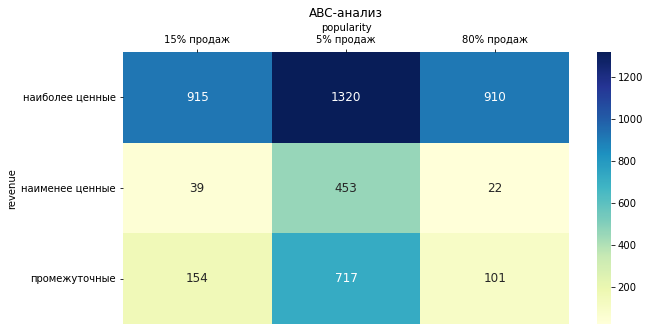

In [36]:
f, ax = plt.subplots(figsize=(10,5))

sns.heatmap(ABC_pivot,
            annot=True,
            cmap="YlGnBu",
            fmt='g',
            annot_kws={'size':12})

plt.title("ABC-анализ")
plt.yticks(rotation=0)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.ylabel('revenue')
plt.xlabel('popularity')
plt.show()


In [37]:
# Данная таблица дает общую картину на основе объемов продаж и прибыли. Видим, что "наиболее ценные" (группа А)
# и важные ресурсы компании приносят максимальные продажи.Также видим, что "промежуточные" (группа В) также обеспечивают
# стабильно умеренные продажи.

## Задание 7

__Выгрузи данные по товарам с меткой по ABC-анализу__

1. Объедини по `stock_code` в одной таблице `ABC-код`, описание товара и `ID `

2. Выгрузи таблицу в `csv` для отправки в отдел закупок

In [38]:
table=prod[['stock_code', 'group']]
table

,stock_code,group
3410,84077,BA
4058,85099B,BA
4080,85123A,BA
601,21212,AA
2726,23843,AA
...,...,...
2936,37484,AC
4144,85171,CC
2917,37451,AC
2907,37438,AC


In [39]:
table_1=products[['stock_code','description']]
table_1

,stock_code,description
0,22751,FELTCRAFT PRINCESS OLIVIA DOLL
1,22750,FELTCRAFT PRINCESS LOLA DOLL
2,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL
3,22654,DELUXE SEWING KIT
4,22652,TRAVEL SEWING KIT
...,...,...
779490,85178,VICTORIAN SEWING KIT
779491,85177,BASKET OF FLOWERS SEWING KIT
779492,85176,SEWING SUSAN 21 NEEDLE SET
779493,22813,PACK 3 BOXES BIRD PANNETONE


In [40]:
table_ABC=pd.merge(table_1,
                   table,
                   on = 'stock_code',
                   how = 'left')
table_ABC

,stock_code,description,group
0,22751,FELTCRAFT PRINCESS OLIVIA DOLL,AB
1,22750,FELTCRAFT PRINCESS LOLA DOLL,AA
2,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,AA
3,22654,DELUXE SEWING KIT,AB
4,22652,TRAVEL SEWING KIT,AA
...,...,...,...
779490,85178,VICTORIAN SEWING KIT,CA
779491,85177,BASKET OF FLOWERS SEWING KIT,CB
779492,85176,SEWING SUSAN 21 NEEDLE SET,CA
779493,22813,PACK 3 BOXES BIRD PANNETONE,AA


In [41]:
table_ABC[[]].to_csv('ABC.csv')

# 🎉🎉🎉 Поздравляем, ты великолепен! 